# KNN with Abalone Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline          
#importing libraries

Reading and preparing data

In [2]:
#creating list with column names
column_names = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

#reading dataset
df = pd.read_csv('C:/Users/Ricardo/Downloads/abalone/abalone.data.csv',
                 header=None, names=['data'])

#no headers, first row will be column_names, names = [data] will force the dataset to have only one column

df = df['data'].str.split(',', expand=True)          #separate the dataframe according to the commas
df.columns = column_names
df.to_csv('separated_data.csv', index=False)

#convert numbers from string to float

columns_to_convert = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df[columns_to_convert] = df[columns_to_convert].astype(float)

#create age column: ring column + 1.5

df['age'] = df['Rings'] + 1.5

#converting the different utilities of abalone to numbers. 
#0 are abalones that will be user for appetizer, 1 can be used for main dish

df['maturity'] = df['age'].apply(lambda x: 0 if x < 9 else 1)

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age,maturity
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,16.5,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,8.5,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,10.5,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,11.5,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,8.5,0


Visualizing

C:\Users\Ricardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


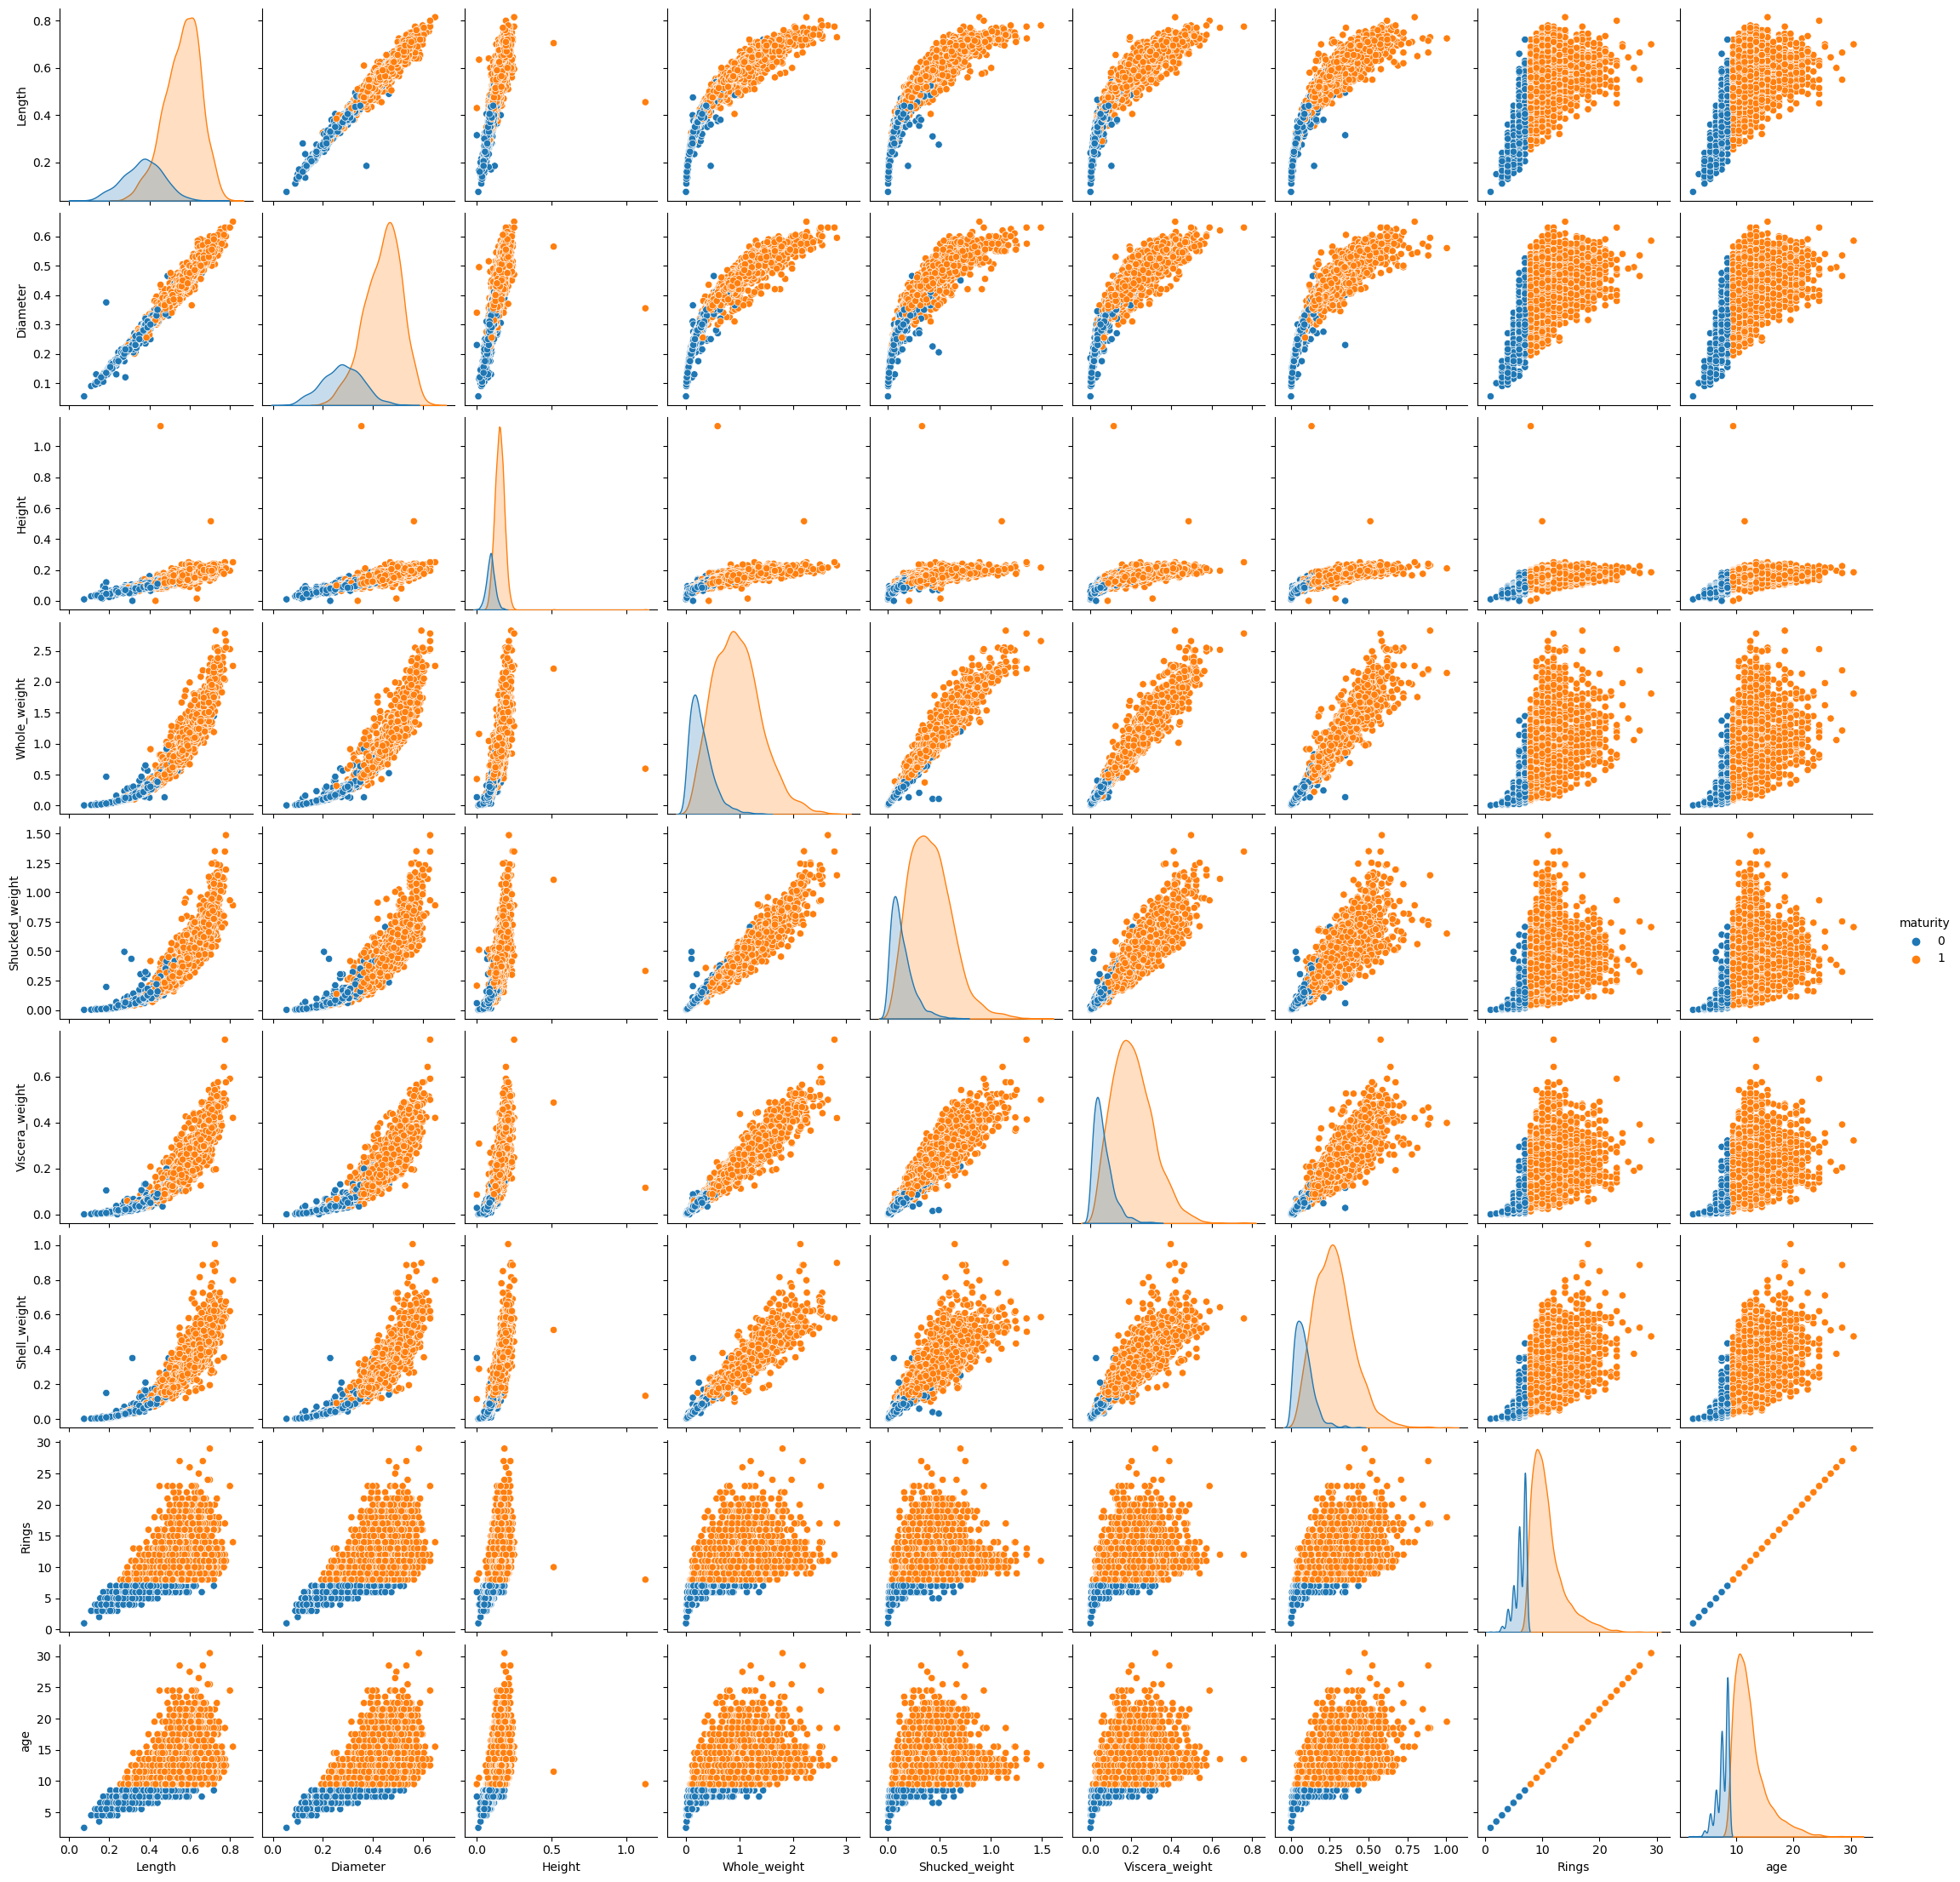

In [9]:
sns.pairplot(df, hue = 'maturity')

#hue is the parameter we are using, therefore, the data will be seaprated according to maturity

Splitting DF

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Sex', axis = 1)

In [6]:
X.drop('maturity', axis = 1)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,11.5


In [7]:
Y = df['maturity']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler    
#MinMaxScaler standardizes values from 0 to 1, using as parameters the lowest and the highest values

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
scaling_X = scaler.fit_transform(X)

Value of K = 9

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_project = KNeighborsClassifier(n_neighbors = 9)
knn_project.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [14]:
y_predict = knn_project.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_predict)
print('Accuracy:', accuracy)

Accuracy: 1.0


Value of K up to 200:
understanding if the accuracy changes when value of K varies from 1 to 200

In [46]:
k_values = [i for i in range (1,200)]
scores = []

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import cross_val_score
for k in k_values:
    knn_project = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_project, X, Y, cv = 5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

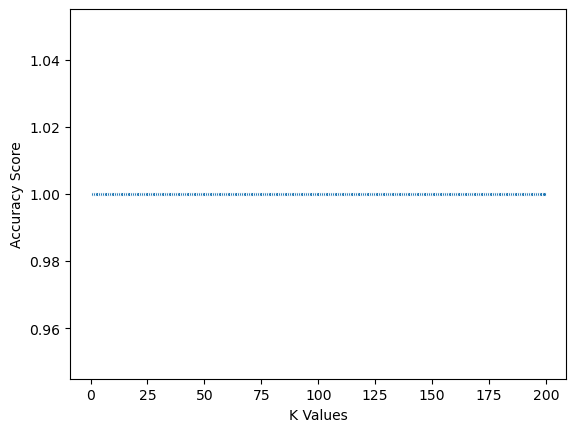

In [49]:
sns.lineplot(x = k_values, y = scores, marker = '.')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')